<a href="https://colab.research.google.com/github/douglaslpo/Estatistica-Aplicada/blob/main/Estatistica_Moda_Media_Mediana_Assimetria_etc_kc_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a proposta será aqui, assim que o professor definir!

In [2]:
#importando o dataset do drive para não perder o mesmo quando reiniciar o colab!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lista os arquivos que estão no seu drive!
!ls '/content/drive/My Drive/'

 appsheet
 artigo.gdoc
'Colab Notebooks'
'Cronograma de Estudos Diários.gsheet'
 datasets
'Documento sem título (1).gdoc'
'Documento sem título (2).gdoc'
'Documento sem título.gdoc'
'Original de Sudoku Aplicando Algoritmos para Tratamento de uma Pipeline e Solução do Tabuleiro.gdoc'
'Planilha Controle de Estudo 2.0.xlsm'
'Sudoku Aplicando Algoritmos para Tratamento de uma Pipeline e Solução do Tabuleiro.gdoc'


In [4]:
#Importações para execução deste dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [5]:
# Caminho onde se encontra o meu DataFrame no meu Drive!
kc_house = '/content/drive/MyDrive/datasets/kc_house_data.csv'

# Carregando o Dataframe
df = pd.read_csv(kc_house)

# Visualize as primeiras linhas do DataFrame, para entender do mesmo.
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [6]:
# Mostrar apenas os nomes das colunas as features
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
# Os features do DF
tipos_de_features = df.dtypes

# Mostrando os tipos das features
print(tipos_de_features)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [8]:
#removendo Features não necessárias nesta amostragem
df.drop(['id','date'], axis=1, inplace=True)

In [9]:
# Os features do DF
tipos_de_features = df.dtypes

# Mostrando features depois do Drop
print(tipos_de_features)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


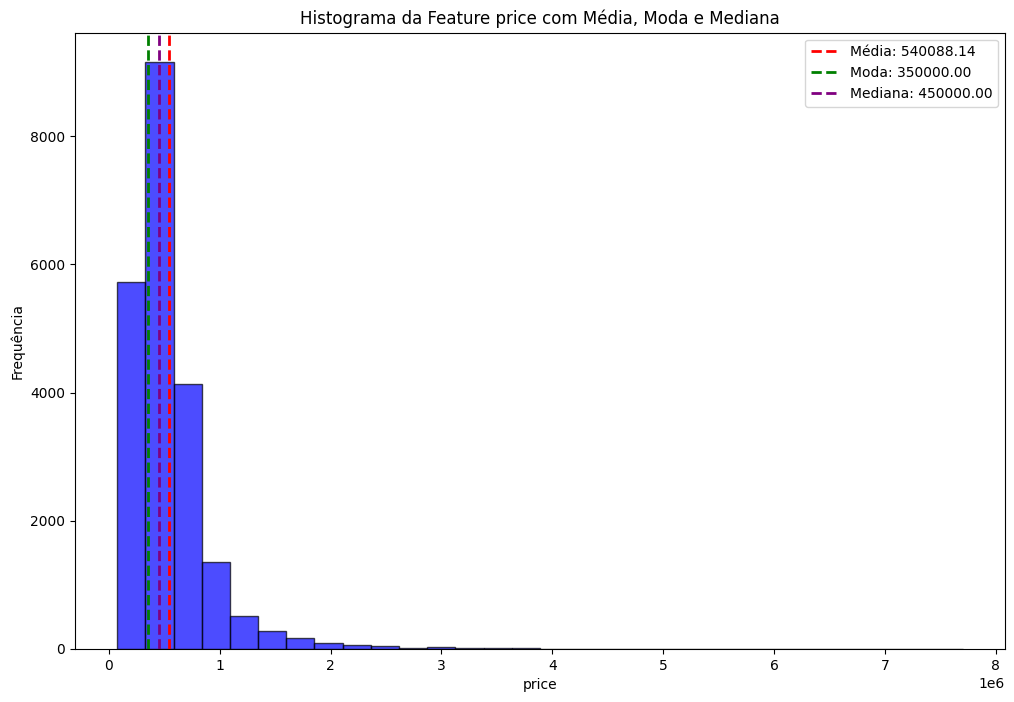

In [10]:
# Coluna escolhida para o histograma, fora a Price
select_feature = 'price'

# Configurações do histograma
plt.figure(figsize=(12, 8))
plt.hist(df[select_feature], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Adicionando a média, moda e mediana como anotações
media = df[select_feature].mean()
moda = df[select_feature].mode().iloc[0]
mediana = df[select_feature].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
plt.axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
plt.axvline(mediana, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Adicionando rótulos e título
plt.title(f'Histograma da Feature {select_feature} com Média, Moda e Mediana')
plt.xlabel(select_feature)
plt.ylabel('Frequência')

# Adicionando a legenda ao histograma
plt.legend()

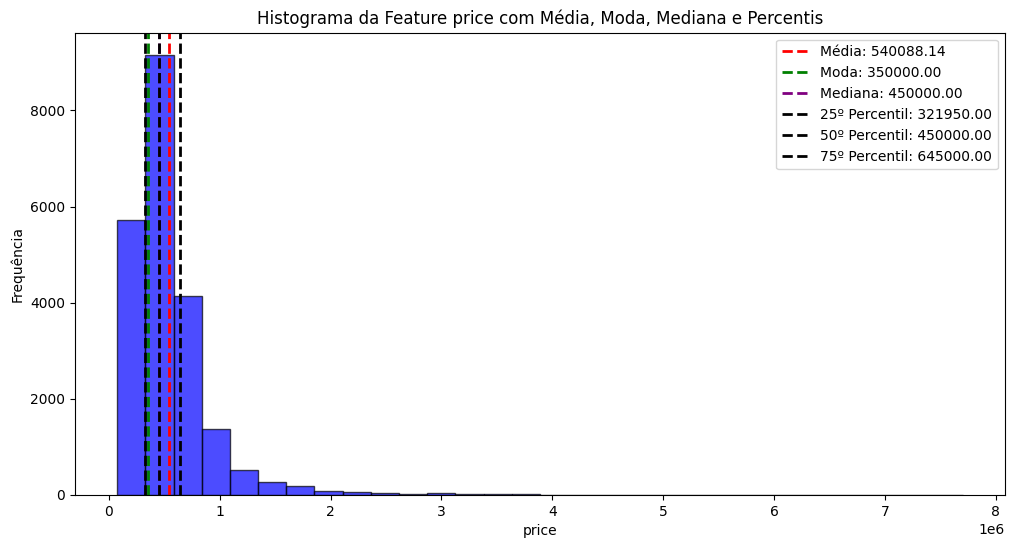

In [11]:
# Coluna escolhida para o histograma, fora a Price
select_feature = 'price'

# Configurações do histograma
plt.figure(figsize=(12, 6))
plt.hist(df[select_feature], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Adicionando a média, moda e mediana como anotações
media = df[select_feature].mean()
moda = df[select_feature].mode().iloc[0]
mediana = df[select_feature].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
plt.axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
plt.axvline(mediana, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Adicionando linhas verticais para os percentis (exemplo: 25%, 75%)
percentis = [25, 50, 75]
for p in percentis:
    perc_value = df[select_feature].quantile(p / 100)
    plt.axvline(perc_value, linestyle='dashed', color='black', linewidth=2, label=f'{p}º Percentil: {perc_value:.2f}')

# Adicionando rótulos e título
plt.title(f'Histograma da Feature {select_feature} com Média, Moda, Mediana e Percentis')
plt.xlabel(select_feature)
plt.ylabel('Frequência')

# Adicionando a legenda ao histograma
plt.legend()
plt.show()

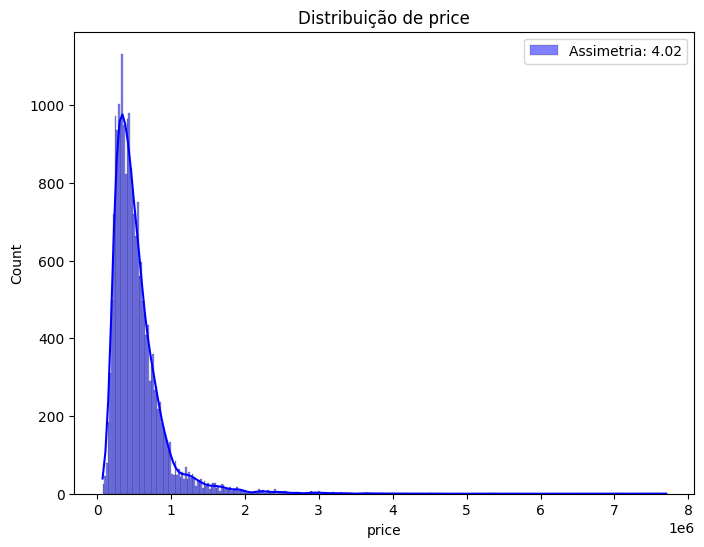

In [12]:
# Selecione a coluna para a qual você deseja calcular a assimetria
coluna_selecionada = 'price'  # Substitua pelo nome da coluna desejada

# Calcule a assimetria para a coluna selecionada
assimetria_coluna = skew(df[coluna_selecionada].dropna())

# Crie um gráfico de distribuição para visualizar a assimetria
plt.figure(figsize=(8, 6))
sns.histplot(df[coluna_selecionada].dropna(), kde=True, color='blue', label=f'Assimetria: {assimetria_coluna:.2f}')
plt.title(f'Distribuição de {coluna_selecionada}')
plt.xlabel(coluna_selecionada)
plt.legend()
plt.show()

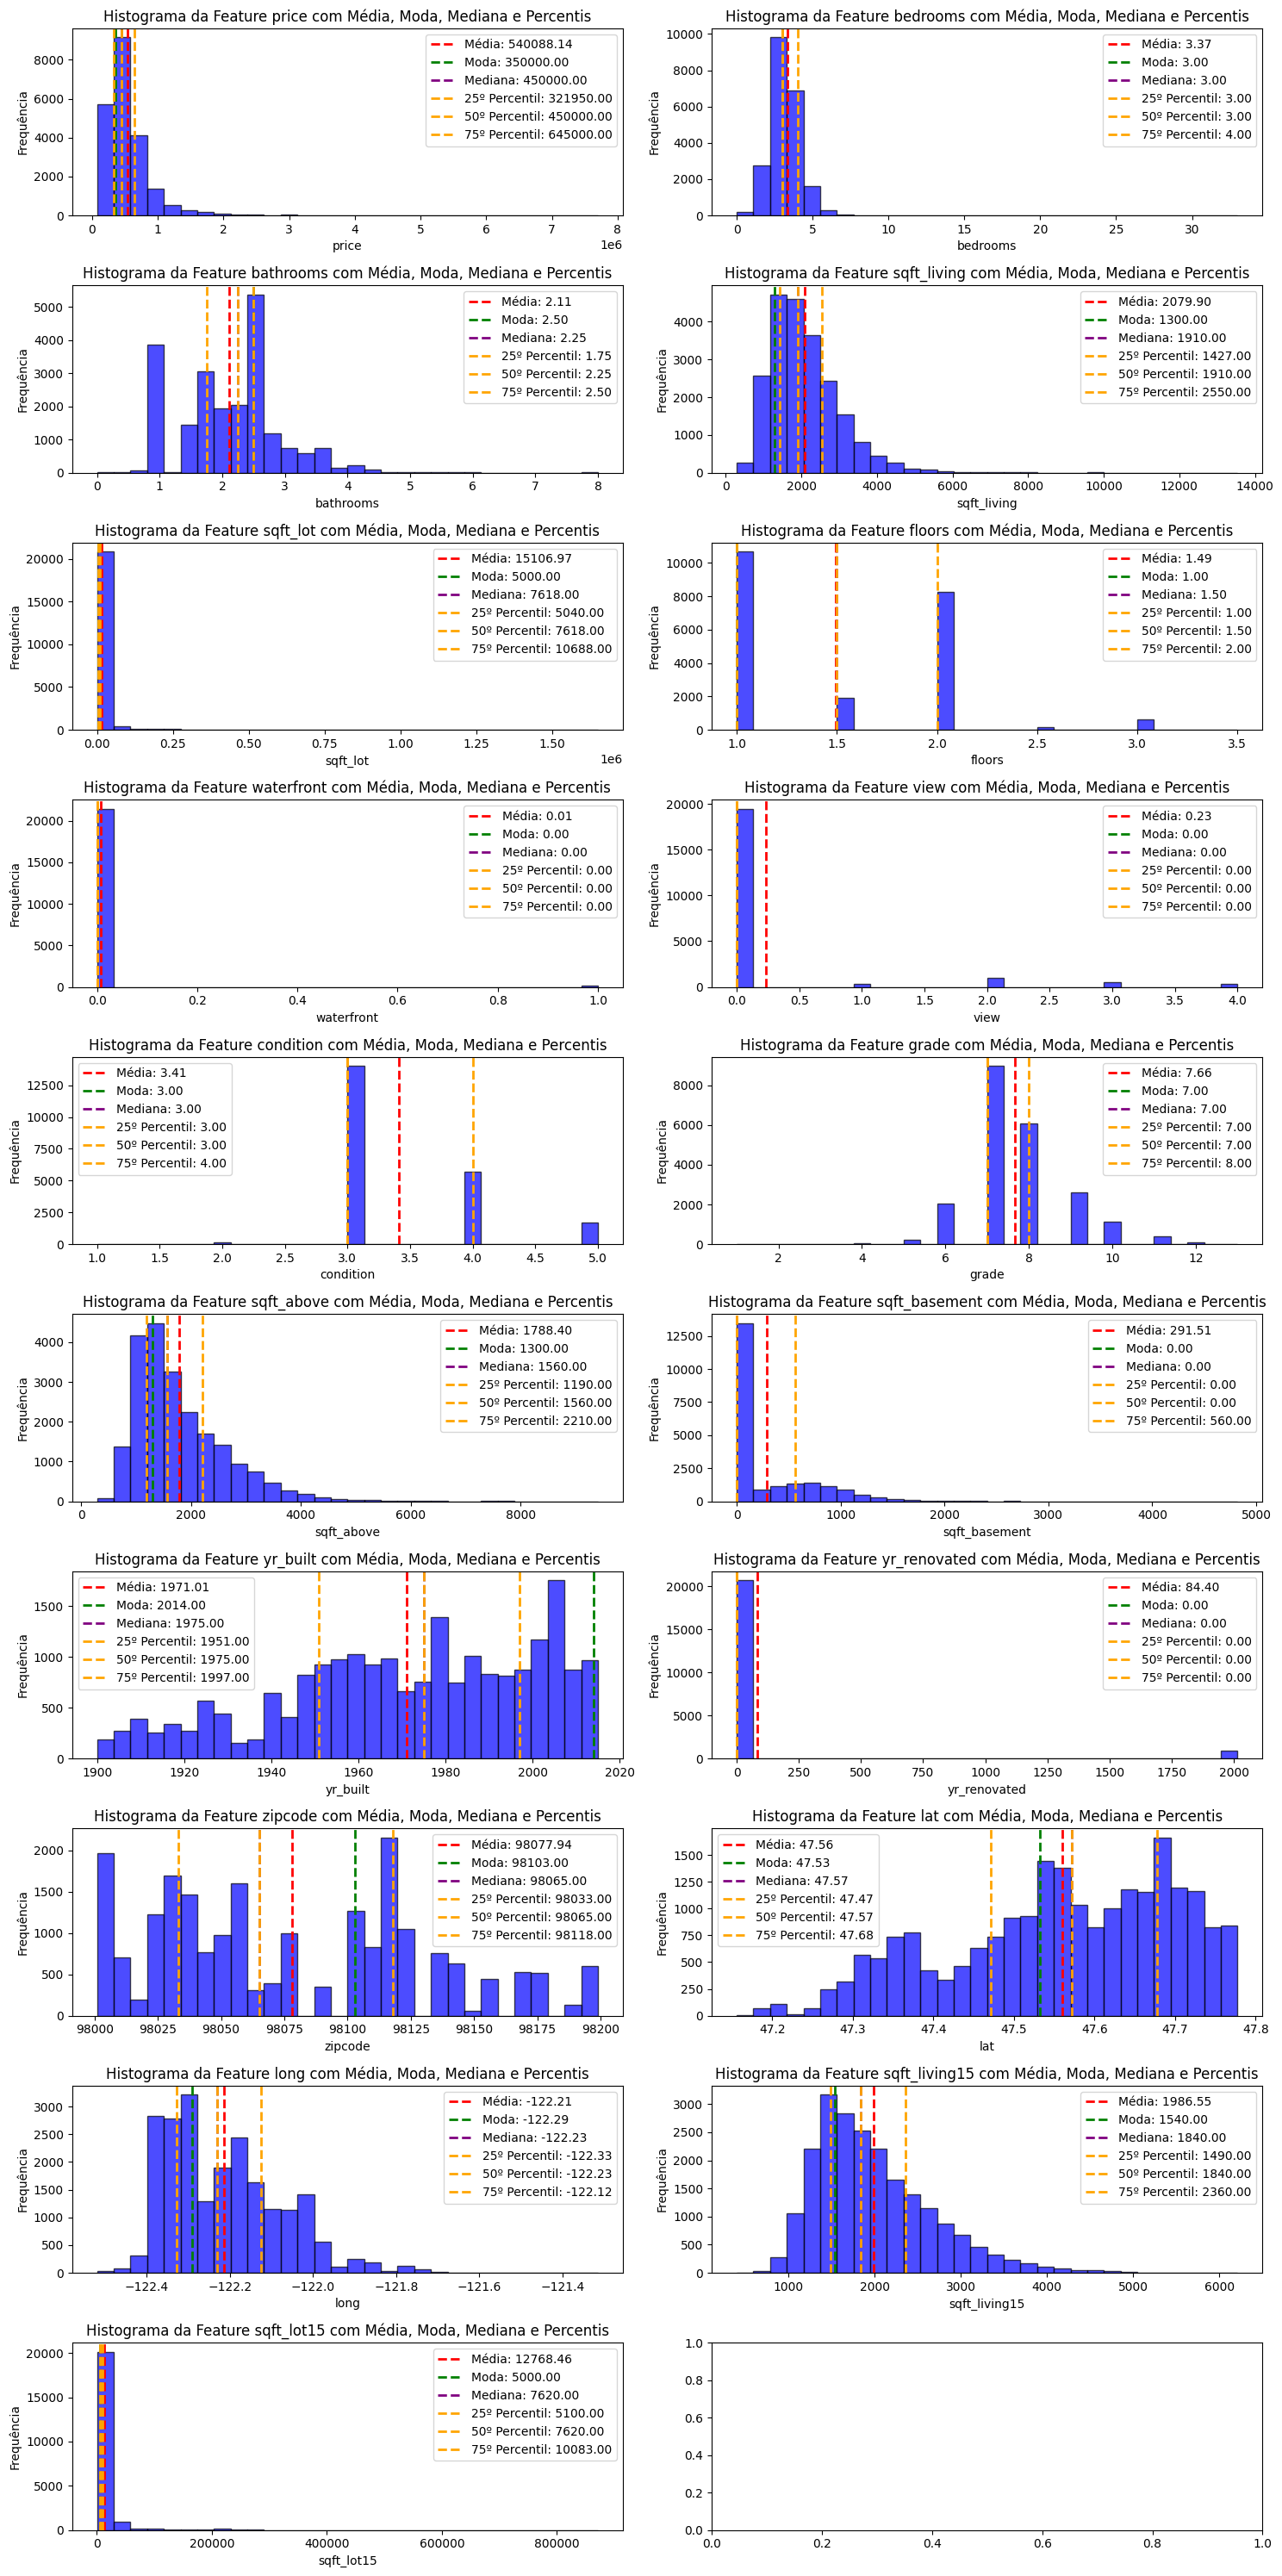

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Lista de colunas
colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Configurações gerais
num_cols = 2  # Número de colunas por linha
num_rows = (len(colunas) + num_cols - 1) // num_cols  # Número de linhas

# Tamanho do gráfico
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Ajuste para casos onde há menos colunas do que o número total de subplots
axes = axes.flatten()
for i, col in enumerate(colunas):
    # Configurações do histograma
    axes[i].hist(df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)

    # Adicionando a média, moda e mediana como anotações
    media = df[col].mean()
    moda = df[col].mode().iloc[0]
    mediana = df[col].median()

    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    axes[i].axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
    axes[i].axvline(mediana, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

    # Adicionando linhas verticais para os percentis (0.25, 0.50, 0.75)
    percentis = [25, 50, 75]
    for p in percentis:
        perc_value = df[col].quantile(p / 100)
        axes[i].axvline(perc_value, linestyle='dashed', color='orange', linewidth=2, label=f'{p}º Percentil: {perc_value:.2f}')

    # Adicionando rótulos e título
    axes[i].set_title(f'Histograma da Feature {col} com Média, Moda, Mediana e Percentis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

    # Adicionando a legenda ao histograma
    axes[i].legend()

# Ajustes de layout
plt.tight_layout()
plt.show()


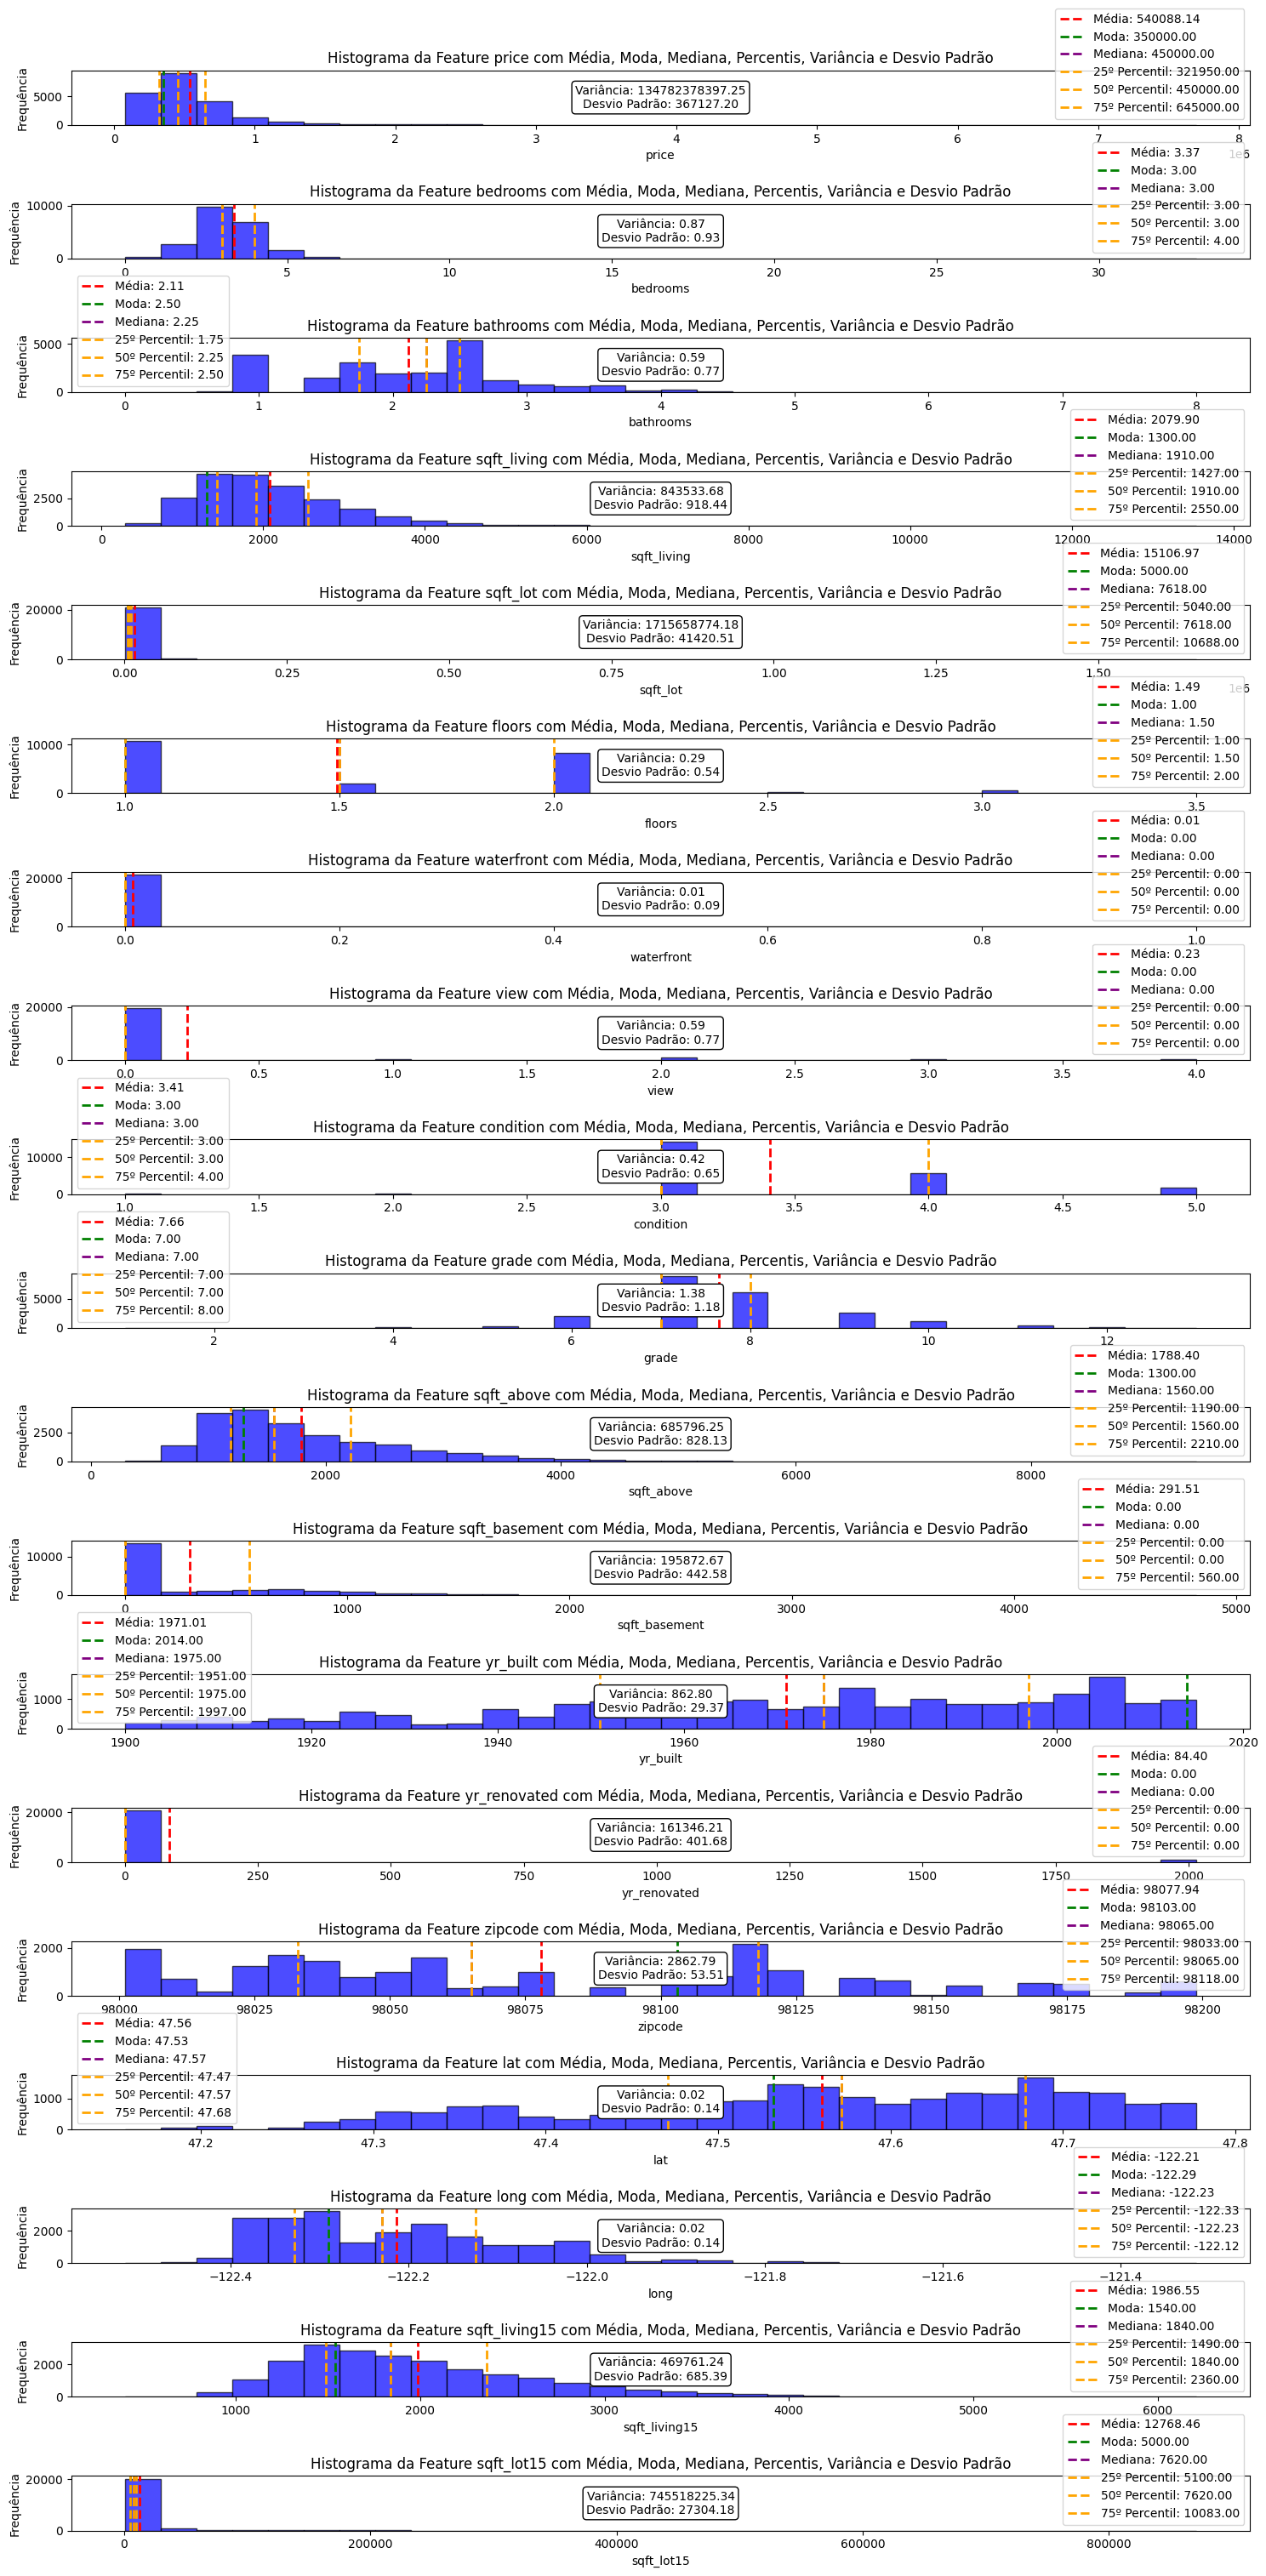

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import mplcursors

# Lista de colunas
colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Configurações gerais
num_cols = 1  # Número de colunas por linha
num_rows = (len(colunas) + num_cols - 1) // num_cols  # Número de linhas

# Tamanho do gráfico
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Ajuste para casos onde há menos colunas do que o número total de subplots
axes = axes.flatten()
for i, col in enumerate(colunas):
    # Configurações do histograma
    axes[i].hist(df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)

    # Adicionando a média, moda e mediana como anotações
    media = df[col].mean()
    moda = df[col].mode().iloc[0]
    mediana = df[col].median()

    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    axes[i].axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
    axes[i].axvline(mediana, color='purple', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

    # Adicionando linhas verticais para os percentis (0.25, 0.50, 0.75)
    percentis = [25, 50, 75]
    for p in percentis:
        perc_value = df[col].quantile(p / 100)
        axes[i].axvline(perc_value, linestyle='dashed', color='orange', linewidth=2, label=f'{p}º Percentil: {perc_value:.2f}')

    # Adicionando variância e desvio padrão como anotações
    variancia = df[col].var()
    desvio_padrao = df[col].std()

    axes[i].annotate(f'Variância: {variancia:.2f}\nDesvio Padrão: {desvio_padrao:.2f}',
                     xy=(0.5, 0.5), xycoords='axes fraction',
                     ha='center', va='center',
                     bbox=dict(boxstyle='round', fc='w'))

    # Adicionando rótulos e título
    axes[i].set_title(f'Histograma da Feature {col} com Média, Moda, Mediana, Percentis, Variância e Desvio Padrão')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

    # Adicionando a legenda ao histograma
    axes[i].legend()

    # Adicionando rótulos interativos
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f'{col}: {sel.target[0]:.2f}'))

# Ajustes de layout
plt.tight_layout()
plt.show()


Feature: price
Dispersão: 367127.19648269983
Assimetria: 4.023789858140135
Curtose: 34.577262255687536



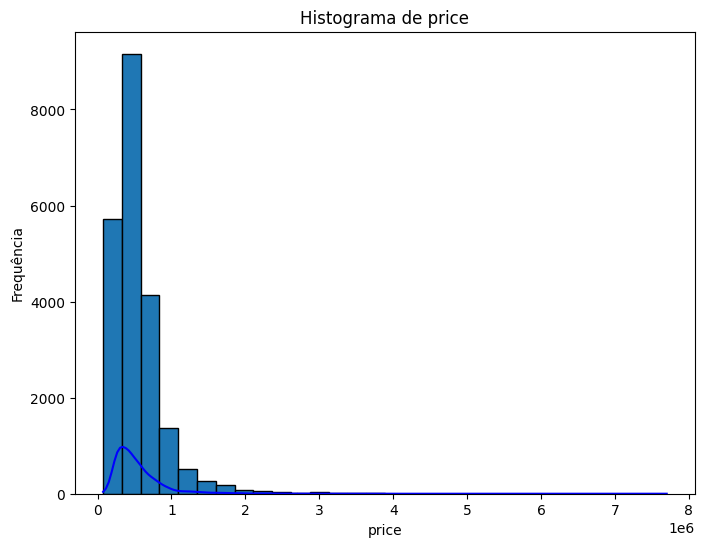

Feature: bedrooms
Dispersão: 0.9300618311474517
Assimetria: 1.9741625111266883
Curtose: 49.05202582325276



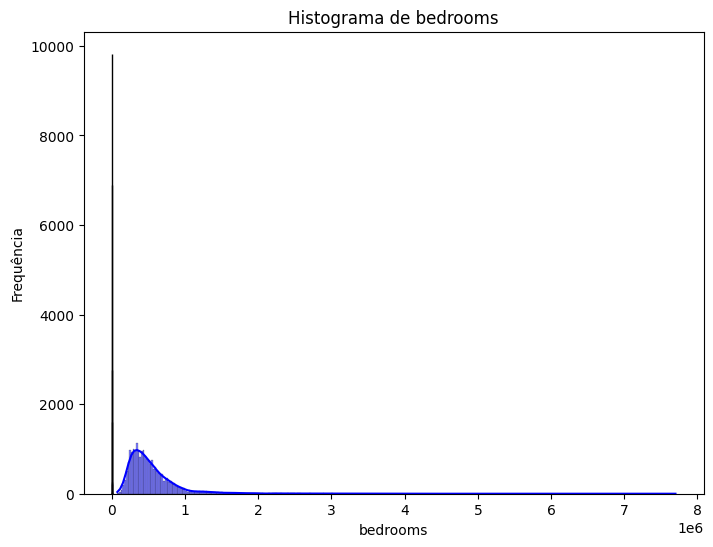

Feature: bathrooms
Dispersão: 0.770163157217742
Assimetria: 0.5110721004310892
Curtose: 1.2793287699931106



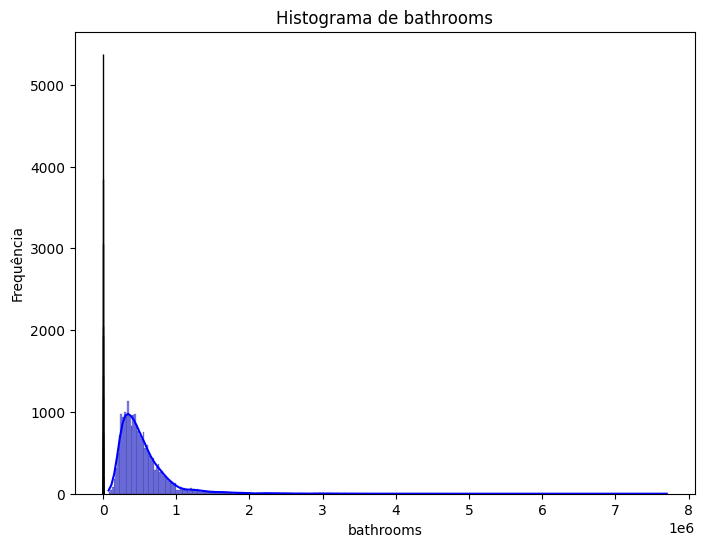

Feature: sqft_living
Dispersão: 918.4408970468115
Assimetria: 1.4714532949510901
Curtose: 5.241602521613769



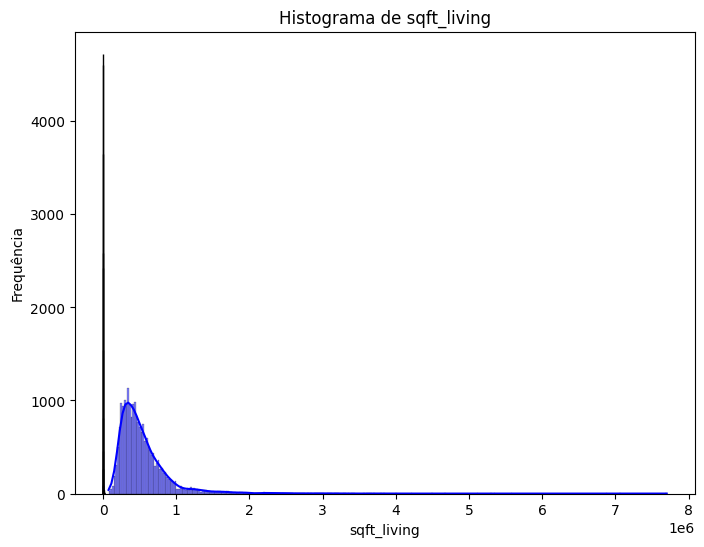

Feature: sqft_lot
Dispersão: 41420.51151513548
Assimetria: 13.059112541314752
Curtose: 285.01159582778826



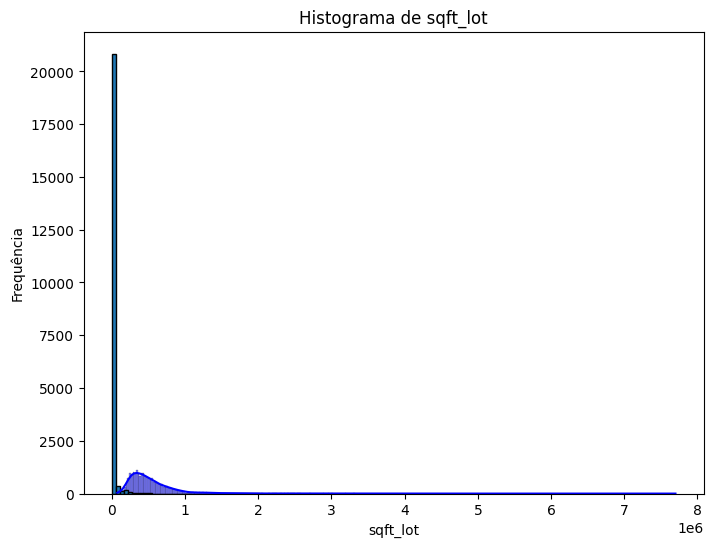

Feature: floors
Dispersão: 0.5399888951423463
Assimetria: 0.6161339560208519
Curtose: -0.48488840505286346



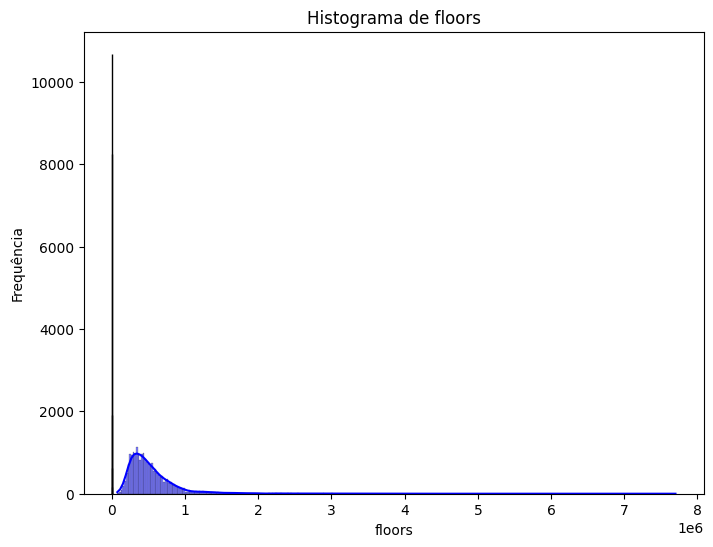

Feature: waterfront
Dispersão: 0.08651719772788764
Assimetria: 11.384317770166954
Curtose: 127.602691092139



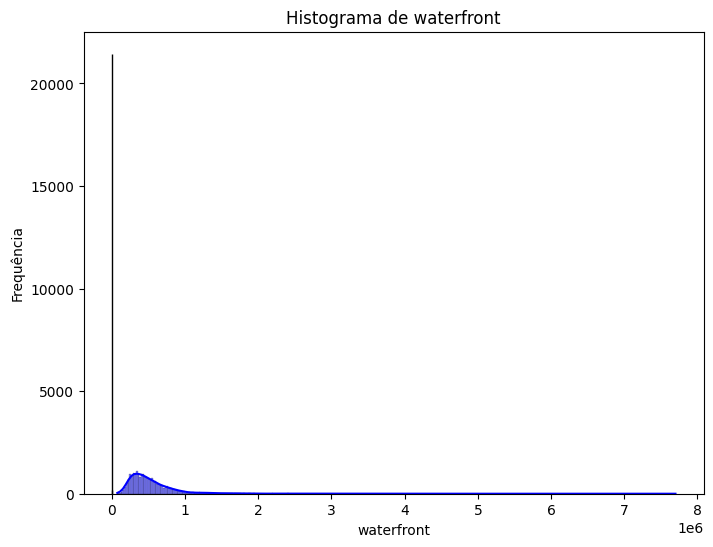

Feature: view
Dispersão: 0.7663175692736122
Assimetria: 3.395513914602039
Curtose: 10.89022423385801



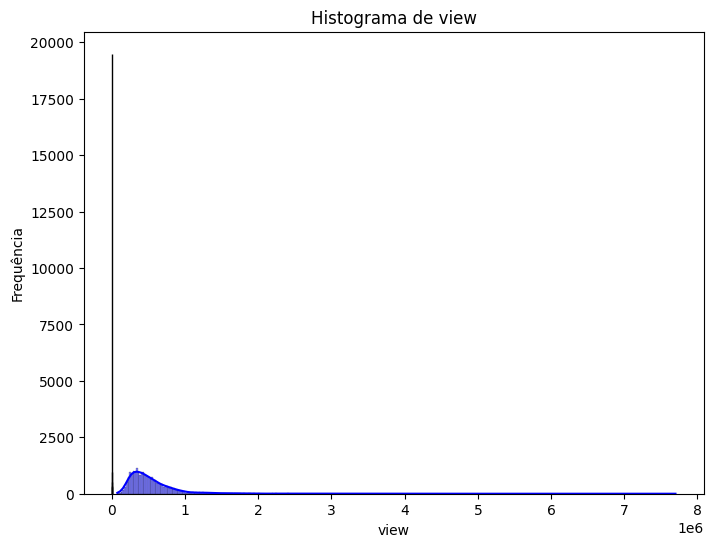

Feature: condition
Dispersão: 0.6507430463662071
Assimetria: 1.0327329566576562
Curtose: 0.5253643439848448



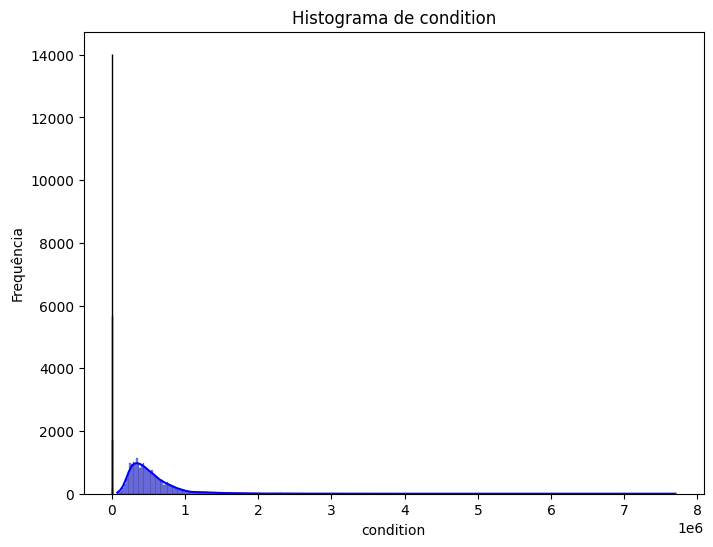

Feature: grade
Dispersão: 1.175458756974335
Assimetria: 0.7710496831015454
Curtose: 1.1903789844878396



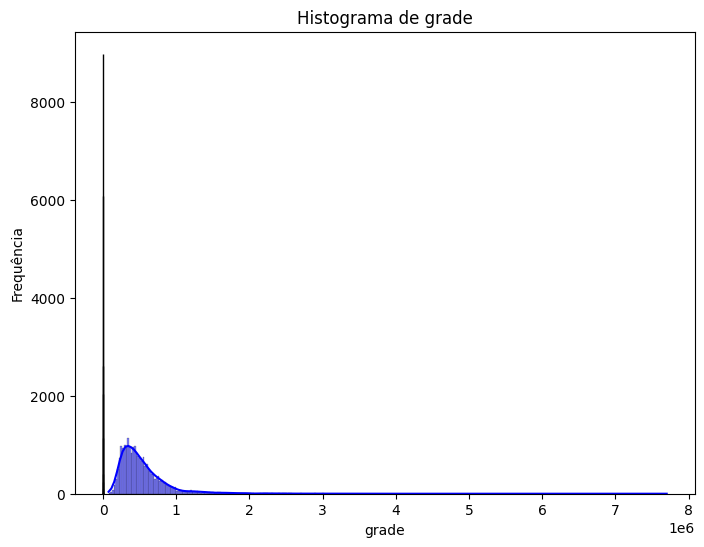

Feature: sqft_above
Dispersão: 828.1281616825365
Assimetria: nan
Curtose: nan



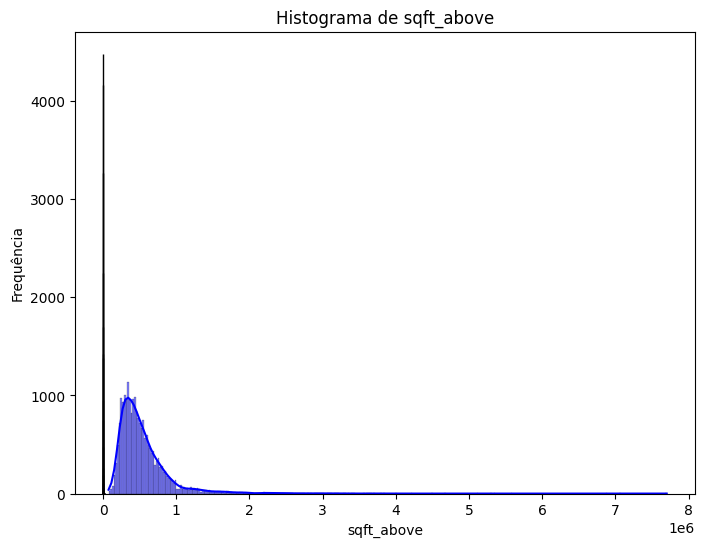

Feature: sqft_basement
Dispersão: 442.5750426774682
Assimetria: 1.577855538493433
Curtose: 2.714668427210353



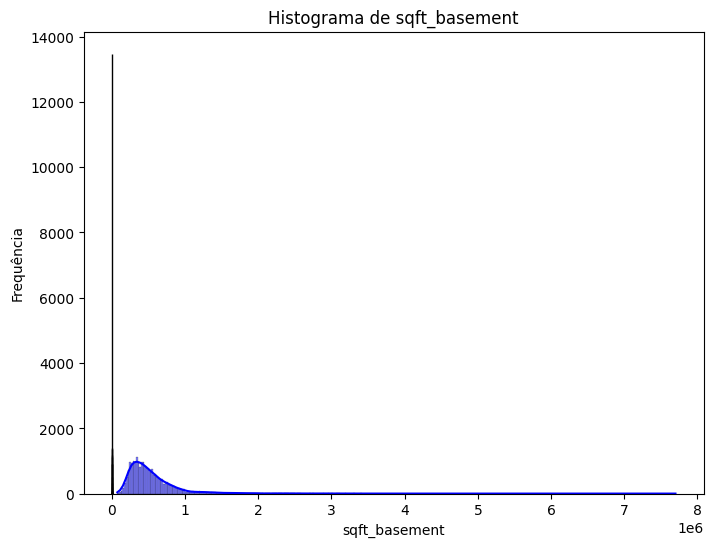

Feature: yr_built
Dispersão: 29.37341080238659
Assimetria: -0.4697727924346707
Curtose: -0.657533026308136



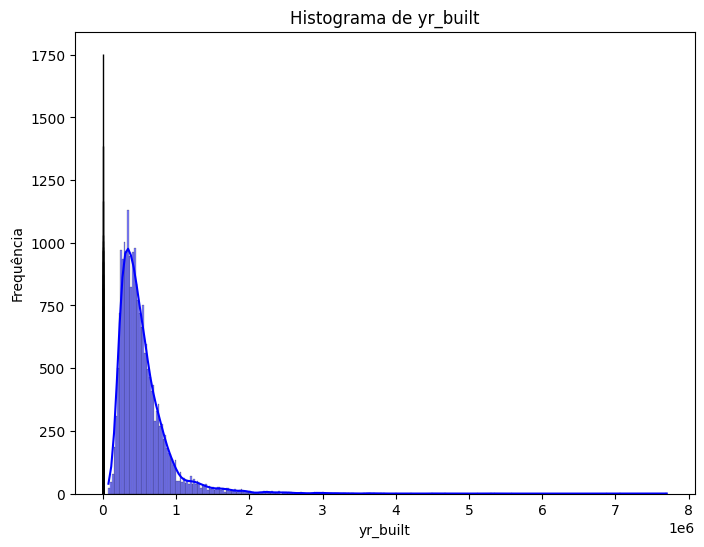

Feature: yr_renovated
Dispersão: 401.6792400191759
Assimetria: 4.549177613900141
Curtose: 18.696548433414677



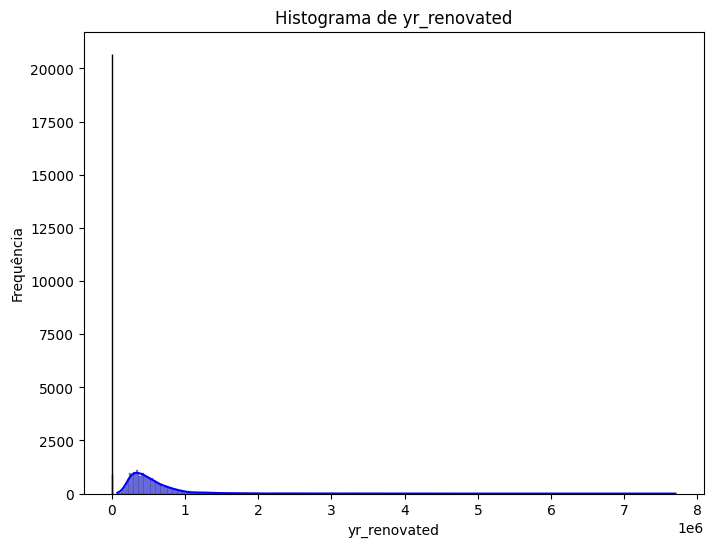

Feature: zipcode
Dispersão: 53.505026257473084
Assimetria: 0.40563305372416186
Curtose: -0.8535590381317446



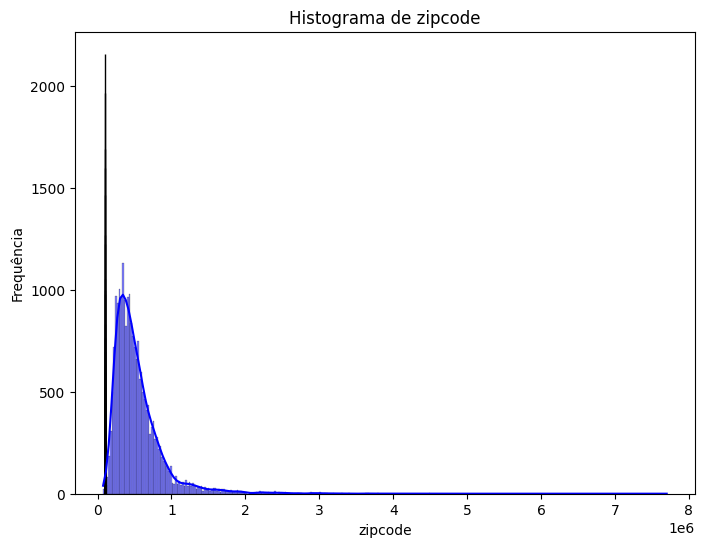

Feature: lat
Dispersão: 0.13856371024192418
Assimetria: -0.48523679681994325
Curtose: -0.6764341498242992



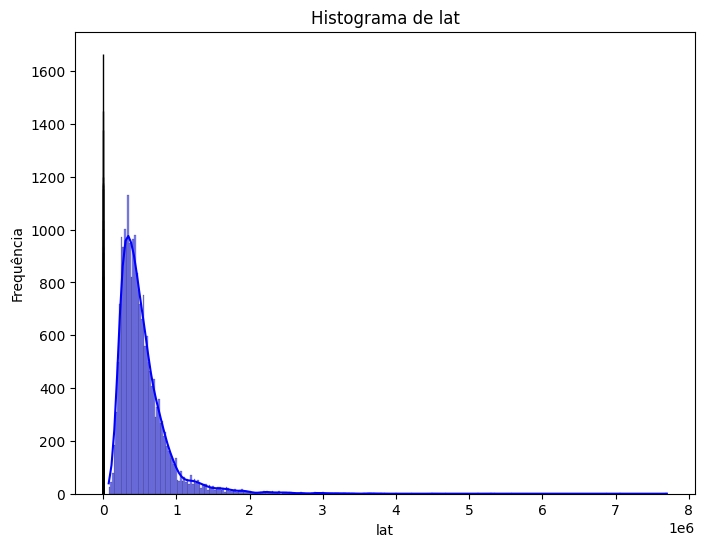

Feature: long
Dispersão: 0.14082834238139408
Assimetria: 0.8849915572046252
Curtose: 1.0489805112706225



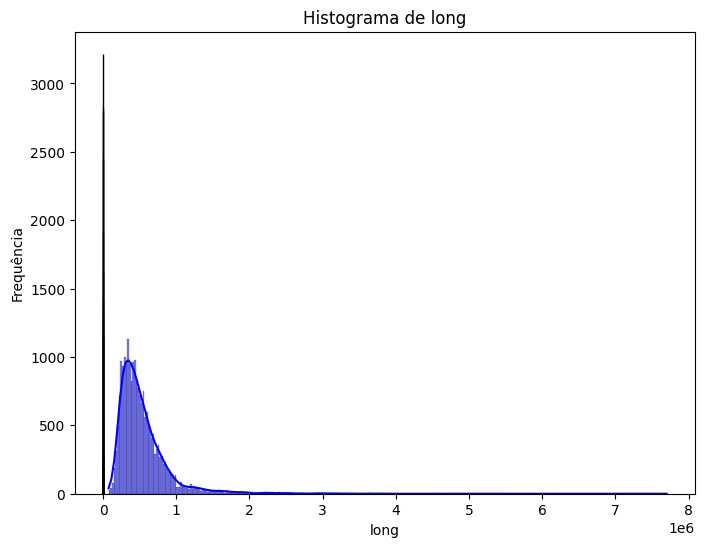

Feature: sqft_living15
Dispersão: 685.3913042527776
Assimetria: 1.108104363669749
Curtose: 1.5964487608061324



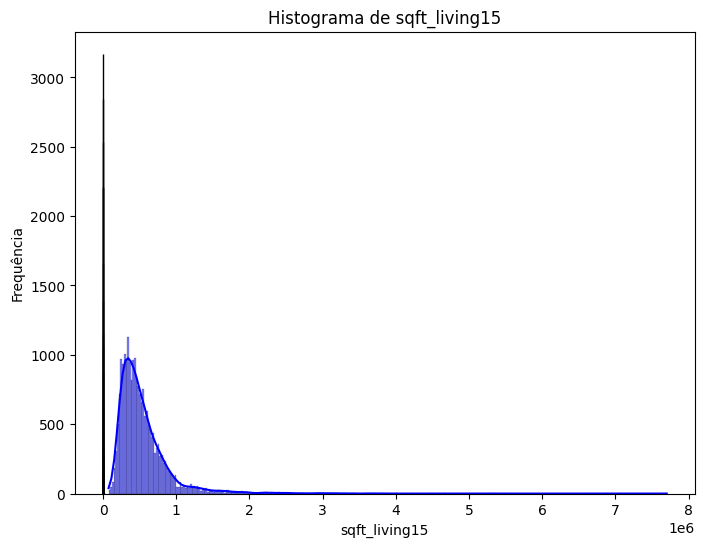

Feature: sqft_lot15
Dispersão: 27304.17963133851
Assimetria: 9.50608344063878
Curtose: 150.72795683083365



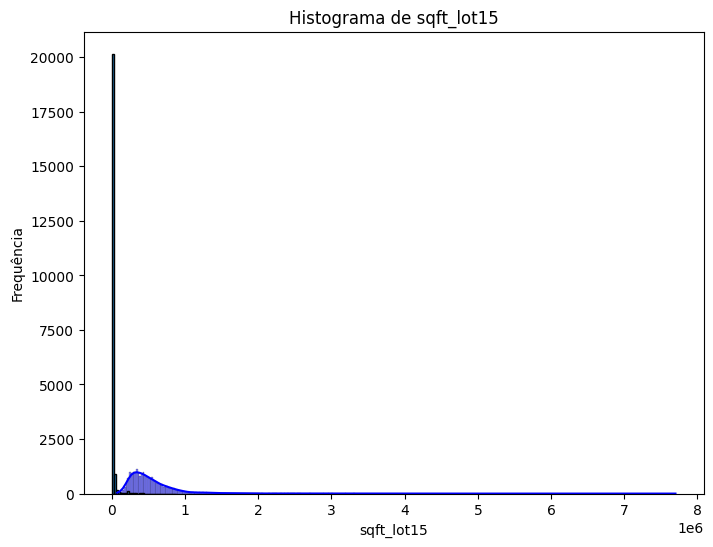

In [23]:
from scipy.stats import skew, kurtosis

colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Calculando e imprimindo dispersão, assimetria e curtose para cada feature
for coluna in colunas:
    print(f'Feature: {coluna}')
    print(f'Dispersão: {df[coluna].std()}')
    print(f'Assimetria: {skew(df[coluna])}')
    print(f'Curtose: {kurtosis(df[coluna])}')
    print()

    # Criando histograma para visualizar a distribuição
    plt.figure(figsize=(8, 6))
    sns.histplot(df[coluna_selecionada].dropna(), kde=True, color='blue', label=f'Assimetria: {assimetria_coluna:.2f}')
    plt.hist(df[coluna], bins=30, edgecolor='black')
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()


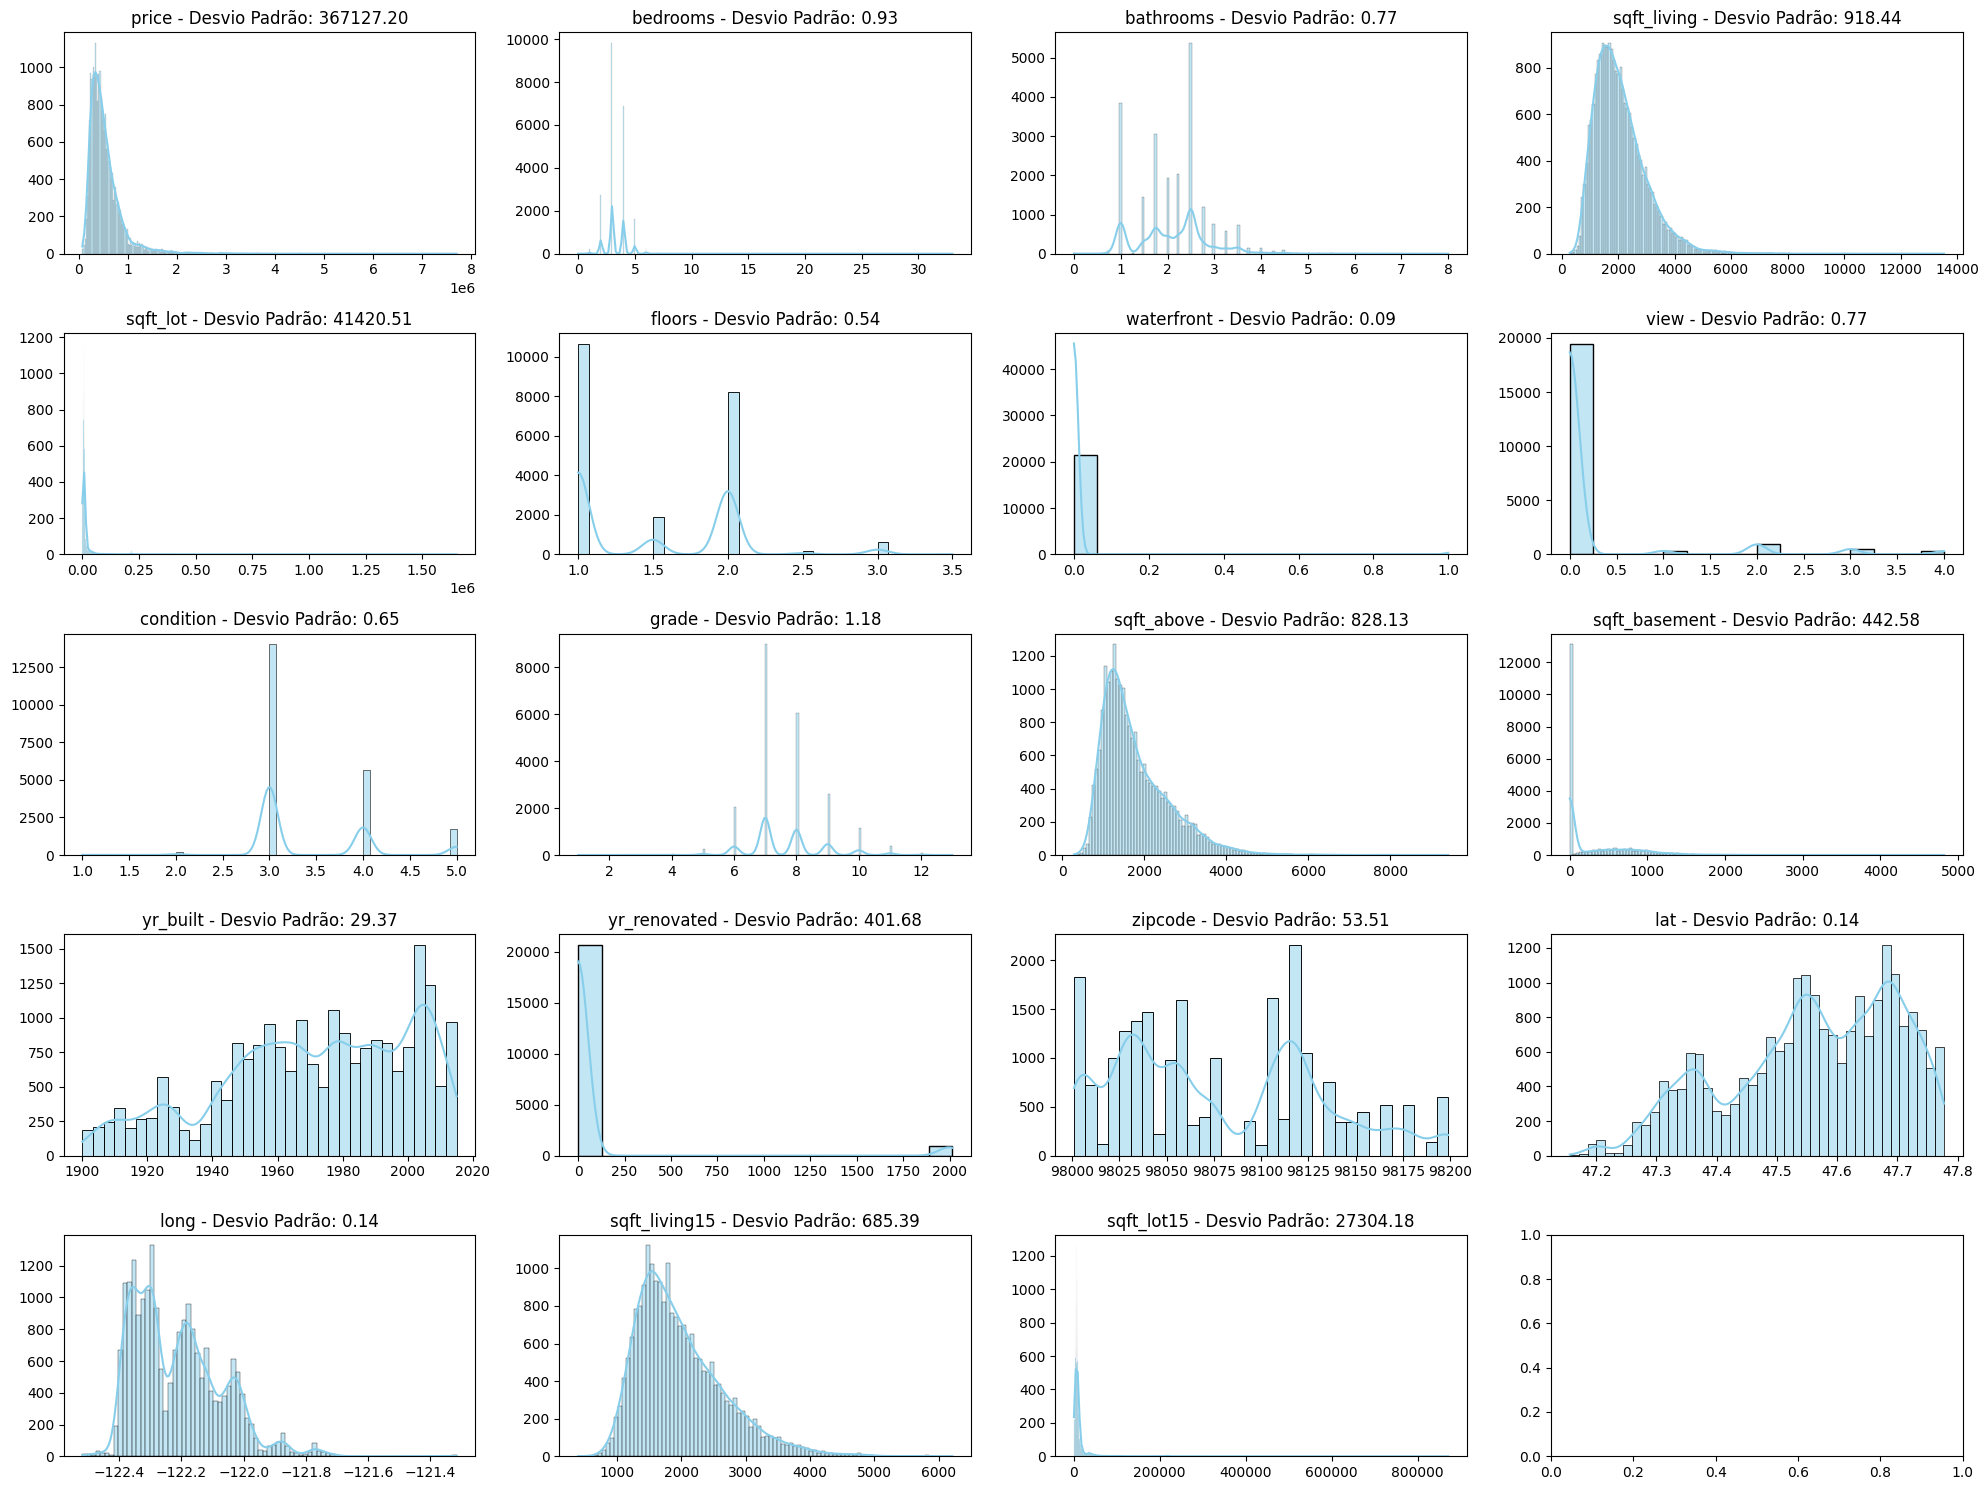

In [27]:
colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Configurando o layout dos subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

# Iterando sobre as features e criando um gráfico para cada uma
for i, coluna in enumerate(colunas):
    row = i // 4
    col = i % 4
    sns.histplot(df[coluna], kde=True, ax=axs[row, col], color='skyblue')
    axs[row, col].set_title(f'{coluna} - Desvio Padrão: {df[coluna].std():.2f}')
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


# Geral:

O código gera histogramas para diversas features do conjunto de dados imobiliários.
Média, Moda, Mediana:

* As linhas verticais representam a média (em vermelho), moda (em verde) e mediana (em roxo) de cada feature.
A média (ou média aritmética) é uma medida central que indica o valor médio dos dados.
A moda é o valor mais frequente no conjunto de dados.
A mediana é o valor que separa a metade inferior e superior dos dados quando ordenados.
Percentis:

* Linhas tracejadas em laranja representam os percentis 25º, 50º (mediana) e 75º de cada feature.
Os percentis fornecem uma visão da dispersão dos dados.
Variância e Desvio Padrão:

* Anotações adicionais apresentam a variância e o desvio padrão de cada feature.
A variância é uma medida de quão dispersos os dados estão.
O desvio padrão é a raiz quadrada da variância e fornece uma medida de dispersão mais interpretável.
Interatividade:

* Rótulos interativos fornecem valores específicos quando você passa o mouse sobre os dados.
Observações:

1 A partir dos histogramas, é possível observar a distribuição dos dados em cada feature.

2 A presença de outliers pode ser identificada visualmente nas caudas das distribuições.

3 O código fornece uma visão abrangente das estatísticas descritivas e da distribuição dos dados, permitindo insights rápidos sobre a centralidade, dispersão e forma das variáveis do conjunto de dados imobiliários.

In [30]:
import pandas as pd

colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Dicionário para armazenar as descrições de cada feature
interpretacao = {}

# Itera sobre cada coluna
for col in colunas:
    descricao = {
        'feature': col,
        'media': df[col].mean(),
        'moda': df[col].mode().iloc[0],
        'mediana': df[col].median(),
        'percentil_25': df[col].quantile(0.25),
        'percentil_50': df[col].quantile(0.50),
        'percentil_75': df[col].quantile(0.75),
        'variancia': df[col].var(),
        'desvio_padrao': df[col].std(),
    }

    interpretacao[col] = descricao

# Imprime as descrições
for col, desc in interpretacao.items():
    print(f"--- {col} ---")
    print(f"Média: {desc['media']:.2f}")
    print(f"Moda: {desc['moda']:.2f}")
    print(f"Mediana: {desc['mediana']:.2f}")
    print(f"25º Percentil: {desc['percentil_25']:.2f}")
    print(f"50º Percentil (Mediana): {desc['percentil_50']:.2f}")
    print(f"75º Percentil: {desc['percentil_75']:.2f}")
    print(f"Variância: {desc['variancia']:.2f}")
    print(f"Desvio Padrão: {desc['desvio_padrao']:.2f}")
    print("\n")


--- price ---
Média: 540088.14
Moda: 350000.00
Mediana: 450000.00
25º Percentil: 321950.00
50º Percentil (Mediana): 450000.00
75º Percentil: 645000.00
Variância: 134782378397.25
Desvio Padrão: 367127.20


--- bedrooms ---
Média: 3.37
Moda: 3.00
Mediana: 3.00
25º Percentil: 3.00
50º Percentil (Mediana): 3.00
75º Percentil: 4.00
Variância: 0.87
Desvio Padrão: 0.93


--- bathrooms ---
Média: 2.11
Moda: 2.50
Mediana: 2.25
25º Percentil: 1.75
50º Percentil (Mediana): 2.25
75º Percentil: 2.50
Variância: 0.59
Desvio Padrão: 0.77


--- sqft_living ---
Média: 2079.90
Moda: 1300.00
Mediana: 1910.00
25º Percentil: 1427.00
50º Percentil (Mediana): 1910.00
75º Percentil: 2550.00
Variância: 843533.68
Desvio Padrão: 918.44


--- sqft_lot ---
Média: 15106.97
Moda: 5000.00
Mediana: 7618.00
25º Percentil: 5040.00
50º Percentil (Mediana): 7618.00
75º Percentil: 10688.00
Variância: 1715658774.18
Desvio Padrão: 41420.51


--- floors ---
Média: 1.49
Moda: 1.00
Mediana: 1.50
25º Percentil: 1.00
50º Percentil

In [32]:
import pandas as pd

# Vamos criar um DataFrame fictício para simular os dados
# Substitua isso com seu DataFrame real
# df = ...

# Lista de colunas
colunas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

# Dicionário para armazenar as descrições de cada feature
interpretacao = {}

# Itera sobre cada coluna
for col in colunas:
    descricao = {
        'feature': col,
        'media': df[col].mean(),
        'moda': df[col].mode().iloc[0],
        'mediana': df[col].median(),
        'percentil_25': df[col].quantile(0.25),
        'percentil_50': df[col].quantile(0.50),
        'percentil_75': df[col].quantile(0.75),
        'variancia': df[col].var(),
        'desvio_padrao': df[col].std(),
    }

    interpretacao[col] = descricao

# Imprime as descrições
for col, desc in interpretacao.items():
    print(f"--- {col} ---")
    print(f"Média: {desc['media']:.2f}")
    print(f"Moda: {desc['moda']:.2f}")
    print(f"Mediana: {desc['mediana']:.2f}")
    print(f"25º Percentil: {desc['percentil_25']:.2f}")
    print(f"50º Percentil (Mediana): {desc['percentil_50']:.2f}")
    print(f"75º Percentil: {desc['percentil_75']:.2f}")
    print(f"Variância: {desc['variancia']:.2f}")
    print(f"Desvio Padrão: {desc['desvio_padrao']:.2f}")

    # Descrição detalhada (substitua com dados reais)
    if 'price' in col:
        print("Esta feature representa o preço das casas no conjunto de dados.")
        print("O preço médio é calculado em torno de $ {:.2f}.".format(desc['media']))
        print("A moda representa o valor mais frequente, enquanto a mediana é o valor central.")
        print("Os percentis indicam a distribuição dos preços.")
        print("A variância e o desvio padrão fornecem medidas de dispersão.")
    elif 'bedrooms' in col:
        print("Esta feature representa o número de quartos nas casas.")
        print("A média indica a quantidade média de quartos nas casas do conjunto de dados.")
        print("A moda é o valor mais comum e a mediana é o valor central.")
        print("Valores maiores podem indicar casas mais espaçosas ou luxuosas.")
    elif 'bathrooms' in col:
        print("Esta feature representa o número de banheiros nas casas.")
        print("A média indica a quantidade média de banheiros nas casas do conjunto de dados.")
        print("A moda é o valor mais comum e a mediana é o valor central.")
        print("Valores maiores podem indicar casas mais espaçosas ou luxuosas.")
    elif 'sqft_living' in col:
        print("Esta feature representa a área de estar em pés quadrados nas casas.")
        print("Valores mais altos indicam casas mais espaçosas.")
    elif 'sqft_lot' in col:
        print("Esta feature representa o tamanho do lote em pés quadrados.")
        print("Valores mais altos indicam lotes maiores.")
    elif 'floors' in col:
        print("Esta feature representa o número de andares nas casas.")
        print("Casas com mais andares podem ter um preço diferente.")
    elif 'waterfront' in col:
        print("Esta feature indica se a casa tem uma vista para a água (1 para sim, 0 para não).")
        print("Casas com vista para a água podem ter um preço diferente.")
    elif 'view' in col:
        print("Esta feature representa a classificação da vista da casa.")
        print("Uma classificação mais alta pode indicar uma vista melhor e afetar o preço.")
    elif 'condition' in col:
        print("Esta feature representa a condição geral da casa.")
        print("Casas em melhor estado podem ter um preço diferente.")
    elif 'grade' in col:
        print("Esta feature representa a classificação geral atribuída às unidades habitacionais com base no sistema de classificação do condado.")
        print("Uma classificação mais alta pode indicar uma casa de maior qualidade e afetar o preço.")
    elif 'sqft_above' in col:
        print("Esta feature representa a área em pés quadrados acima do nível do solo.")
        print("Pode indicar a área útil da casa excluindo o porão.")
    elif 'sqft_basement' in col:
        print("Esta feature representa a área em pés quadrados do porão.")
        print("A presença e tamanho do porão podem afetar o preço da casa.")
    elif 'yr_built' in col:
        print("Esta feature representa o ano de construção da casa.")
        print("Casas mais antigas podem ter características diferentes e afetar o preço.")
    elif 'yr_renovated' in col:
        print("Esta feature representa o ano de renovação da casa.")
        print("Casas renovadas recentemente podem ter um preço diferente.")
    elif 'zipcode' in col:
        print("Esta feature representa o código postal da localização da casa.")
        print("O código postal pode influenciar o preço da casa.")
    elif 'lat' in col:
        print("Esta feature representa a latitude da localização da casa.")
        print("A localização geográfica pode influenciar o preço da casa.")
    elif 'long' in col:
        print("Esta feature representa a longitude da localização da casa.")
        print("A localização geográfica pode influenciar o preço da casa.")
    elif 'sqft_living15' in col:
        print("Esta feature representa a área de estar em pés quadrados para os 15 vizinhos mais próximos.")
        print("Pode indicar a média da área de estar nas proximidades.")
    elif 'sqft_lot15' in col:
        print("Esta feature representa o tamanho do lote em pés quadrados para os 15 vizinhos mais próximos.")
        print("Pode indicar a média do tamanho do lote nas proximidades.")

    print("\n")


--- price ---
Média: 540088.14
Moda: 350000.00
Mediana: 450000.00
25º Percentil: 321950.00
50º Percentil (Mediana): 450000.00
75º Percentil: 645000.00
Variância: 134782378397.25
Desvio Padrão: 367127.20
Esta feature representa o preço das casas no conjunto de dados.
O preço médio é calculado em torno de $ 540088.14.
A moda representa o valor mais frequente, enquanto a mediana é o valor central.
Os percentis indicam a distribuição dos preços.
A variância e o desvio padrão fornecem medidas de dispersão.


--- bedrooms ---
Média: 3.37
Moda: 3.00
Mediana: 3.00
25º Percentil: 3.00
50º Percentil (Mediana): 3.00
75º Percentil: 4.00
Variância: 0.87
Desvio Padrão: 0.93
Esta feature representa o número de quartos nas casas.
A média indica a quantidade média de quartos nas casas do conjunto de dados.
A moda é o valor mais comum e a mediana é o valor central.
Valores maiores podem indicar casas mais espaçosas ou luxuosas.


--- bathrooms ---
Média: 2.11
Moda: 2.50
Mediana: 2.25
25º Percentil: 1.75